In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
face_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/awantik/scikit_learn_data


In [7]:
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
%matplotlib inline

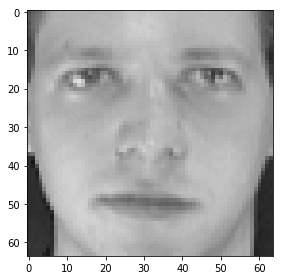

In [8]:
imshow(face_data.images[0])

In [9]:
face_data.target[0]

0

In [12]:
face_data.images.shape

(400, 64, 64)

In [13]:
from sklearn.model_selection import train_test_split

In [19]:
trainX, testX, trainY, testY = train_test_split(face_data.data, face_data.target)

In [20]:
from sklearn.svm import SVC

In [21]:
svc = SVC(kernel='rbf')

In [22]:
svc.fit(trainX,trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
svc.score(testX,testY)

0.0

In [26]:
face_data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [27]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(n_components=64, whiten=True)

In [84]:
face_data_img = pca.fit_transform(face_data.data)

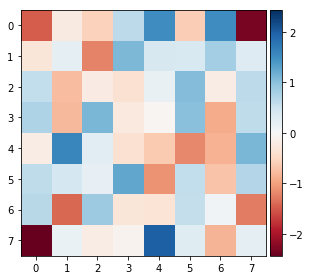

In [85]:
imshow(face_data_img[0].reshape(8,8))

In [70]:
svc = SVC(kernel='rbf')

In [71]:
trainX, testX, trainY, testY = train_test_split(face_data_img, face_data.target)

In [72]:
svc.fit(trainX, trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [73]:
svc.score(testX, testY)

0.88

In [75]:
from sklearn.pipeline import make_pipeline

In [86]:
pipeline = make_pipeline(PCA(n_components=64, whiten=True), SVC(kernel='rbf'))

In [88]:
trainX, testX, trainY, testY = train_test_split(face_data.data, face_data.target)
pipeline.fit(trainX,trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [89]:
pipeline.score(testX,testY)

0.89

In [90]:
pipeline.predict(testX)

array([29, 20, 13, 17,  1, 29, 16, 21, 11, 28, 24, 36,  9, 39,  2, 21, 37,
        6, 34, 30, 31, 25, 38, 10,  0,  3, 26, 27, 24, 16, 36,  4, 28, 23,
       10,  7,  3,  4,  0,  9,  7, 39, 10, 15, 39, 36, 22, 26,  5,  7,  3,
       29, 16, 35,  7,  4,  4, 20, 36, 18, 22,  1, 12, 20, 22, 17, 39, 30,
       17, 33, 17, 28, 34,  8,  2, 38, 23, 33, 15,  1,  5, 30,  4, 34, 26,
       21, 11,  3, 13, 35, 10,  2, 29, 11, 30, 29, 14, 32, 27, 19])

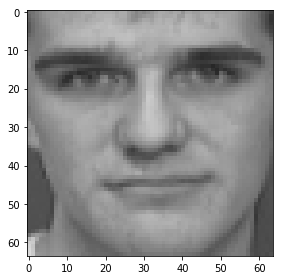

In [96]:
imshow(testX[0].reshape(64,64))

In [97]:
testY[0]

29

In [102]:
res = pipeline.predict(testX)

In [105]:
res29 = testX[res == 29]

In [106]:
res29.shape

(5, 4096)

In [110]:
from joblib import dump, load

In [111]:
dump(pipeline, 'model.pipeline')

['model.pipeline']

In [ ]:
load('model.pipeline')